# NBA 2020-2021 All Game Scores

## Project Goal:
Find all combinations of HOME and VISITING scores for every game in the 2020 - 2021 NBA season using game data from espn.com

### Imports

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import urllib
from time import sleep
import sys

### Functions

In [2]:
# returns list of all score points given game id
def get_one_game_scores(id):
    f = urllib.request.urlopen(f'https://www.espn.com/nba/playbyplay?gameId={id}')
    pbp_source = f.read().decode('utf-8')
    #times = re.findall('time-stamp">([^;]*?)<', pbp_source)
    one_game_scores = re.findall('combined-score">([^;]*?)<', pbp_source)
    temp_df = pd.DataFrame(data=one_game_scores, columns=['scores'])
    return list(temp_df['scores'].unique())

In [3]:
# one_game_score = get_one_game_scores(401266805)
#one_game_score #visiting - home

In [4]:
# pbp: where the scores r
# https://www.espn.com/nba/playbyplay?gameId=401267511
# most easily accessible page:
# https://www.espn.com/nba/game?gameId=401267511

In [30]:
# gets all the game ids for a week given date of one day
def get_all_game_ids_on_day(date):
    f = urllib.request.urlopen(f'https://www.espn.com/nba/schedule/_/date/{date}')
    game_ids_source = f.read().decode('utf-8')
    game_ids = re.findall('gameId/.{9}', game_ids_source)
    game_ids = [i[-9:] for i in game_ids]
    return game_ids

In [31]:
# https://www.espn.com/nba/schedule/_/date/20210205
# get_all_game_ids_on_day(20201221)

In [32]:
# all days of week (monday - sun) are posted on same page
# so only get game ids for mondays

In [33]:
# gets all the game scores of a week given the date of the monday of that week
def get_all_game_scores_given_monday(date):
    game_ids = get_all_game_ids_on_day(date)
    weekly_scores = []
    for game_id in game_ids:
        weekly_scores = weekly_scores + get_one_game_scores(game_id)
    return weekly_scores

In [34]:
# all_scores_0201_ = get_all_game_scores_given_monday(20210201)

In [58]:
# gets all game scores for all weeks where the monday is given
def get_all_scores_given_monday_list(list_of_mondays):
    all_scores = []
    # progress bar count
    loopy_count = 0 
    for monday in list_of_mondays:
        all_scores = all_scores + get_all_game_scores_given_monday(monday)
        
        j = (loopy_count + 1) / len(list_of_mondays)
        loopy_count += 1
        sys.stdout.write('\r')
        sys.stdout.write("[%-20s] %d%%" % ('='*int(20*j), 100*j))
        sys.stdout.flush()
    return all_scores

In [59]:
def allmondays(start, end):
    return pd.date_range(start=start, end=end, 
                         freq='W-MON').strftime('%Y%m%d').tolist()

In [62]:
%%time
data = get_all_scores_given_monday_list(allmondays('12/21/2020', '04/25/2021'))
data[:5]

[====================] 100%CPU times: user 20.2 s, sys: 3.3 s, total: 23.5 s
Wall time: 7min 54s


['0 - 0', '1 - 0', '2 - 0', '2 - 2', '4 - 2']

In [63]:
len(data)

153297

In [80]:
test = pd.DataFrame(data=data, columns=['score'])
#test = pd.concat([test, lol_df])
test['visiting'] = [i[0] for i in test['score'].str.split(' - ')]
test['home'] = [i[1] for i in test['score'].str.split(' - ')]
test['visiting'] = test['visiting'].astype(int)
test['home'] = test['home'].astype(int)
# fig, ax = plt.subplots(figsize=[12, 12])
# ax = sns.scatterplot(data=test, x='home', y='visiting')
test[:5]

,score,visiting,home
0,0 - 0,0,0
1,1 - 0,1,0
2,2 - 0,2,0
3,2 - 2,2,2
4,4 - 2,4,2


### Final Visualization:

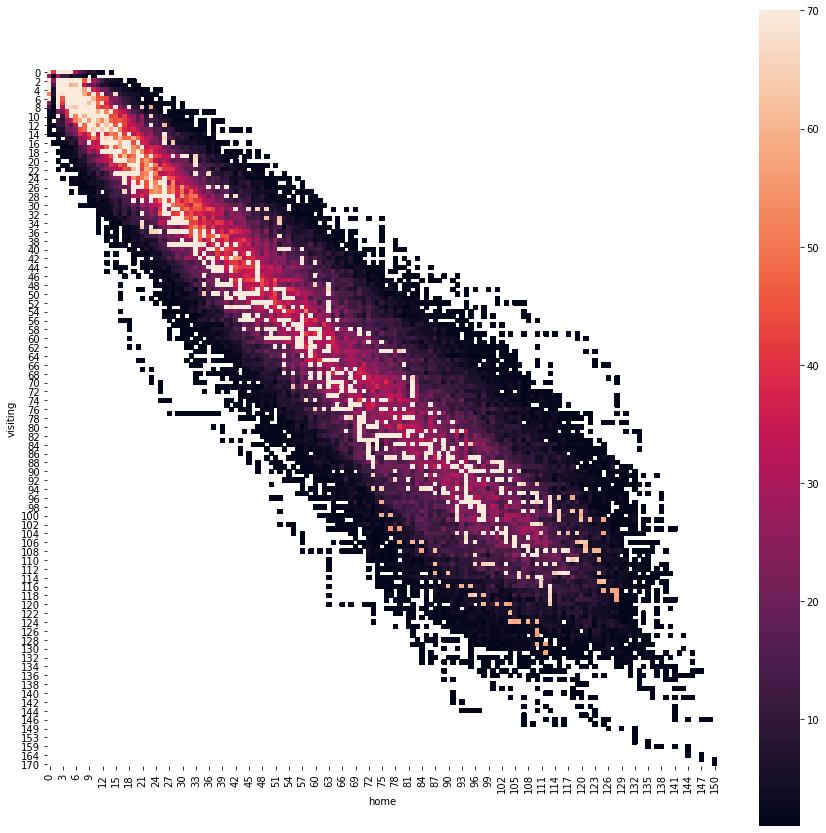

In [91]:
fig, ax = plt.subplots(figsize=[15, 15])
no_score = test[['visiting', 'home']]
no_score['count'] = np.ones(len(no_score))
grouped = no_score.groupby(['visiting', 'home'], as_index=False).sum().pivot('visiting', 'home', 'count')
ax = sns.heatmap(grouped, vmax=70, square=True)

In [82]:
no_score.groupby(['visiting', 'home'], as_index=False).sum().pivot('visiting', 'home')[:20]

count                                                         \
home         0     1      2      3      4      5      6      7      8     
visiting                                                                  
0         1284.0  41.0  365.0  146.0   83.0   69.0   31.0   17.0   12.0   
1           29.0   2.0   29.0   12.0   13.0    5.0    8.0    6.0    4.0   
2          638.0  25.0  497.0  185.0  260.0  167.0  136.0  126.0   46.0   
3          145.0  15.0  128.0   87.0  139.0   59.0   62.0   99.0   33.0   
4          236.0   6.0  296.0   74.0  109.0   98.0  132.0   72.0   57.0   
5           53.0   8.0  162.0   68.0  151.0   85.0   71.0  180.0   59.0   
6           89.0   2.0  191.0   46.0   79.0   83.0  129.0  150.0  126.0   
7           25.0   3.0  161.0   42.0   72.0  133.0   96.0  128.0   70.0   
8           13.0   2.0  155.0   31.0  113.0   65.0   64.0  138.0  136.0   
9            5.0   2.0   24.0   22.0   39.0  108.0   69.0  119.0   76.0   
10           4.0   3.0   72.0   11.0   39.0   85.0   52.0  178.0   60.0   
11           3.0   NaN   12.0    9.0   27.0   35.0   51.0   60.0   70.0   
12           1.0   2.0   11.0   10.0   23.0   14.0   31.0  100.0   48.0   
13           1.0   NaN    7.0    6.0   20.0   20.0   25.0   44.0   48.0   
14           1.0   1.0    3.0    4.0   14.0   17.0   23.0   39.0   32.0   
15           NaN   NaN    2.0    NaN    9.0    6.0   11.0   25.0   30.0   
16           NaN   1.0    1.0    4.0    3.0   10.0    6.0   27.0   22.0   
17           NaN   NaN    NaN    1.0    2.0    2.0    5.0   13.0   17.0   
18           NaN   NaN    1.0    1.0    3.0    3.0    5.0   13.0   14.0   
19           NaN   NaN    NaN    1.0    1.0    3.0    4.0   12.0    7.0   

                 ...                                          
home        9    ... 141 142 143 144 145 146 147 148 149 150  
visiting         ...                                          
0           4.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
1           NaN  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
2          88.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
3          20.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
4          94.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
5          45.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
6         110.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
7          62.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
8         112.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
9         117.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
10        113.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
11         56.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
12        168.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
13         93.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
14         41.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
15         37.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
16         89.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
17         28.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
18         31.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  
19         15.0  ... NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  

[20 rows x 151 columns]

In [90]:
no_score.groupby(['visiting', 'home'], as_index=False).sum().sort_values('count', ascending = False)[:20]

,visiting,home,count
0,0,0,1284.0
24,2,0,638.0
26,2,2,497.0
2,0,2,365.0
65,4,2,296.0
28,2,4,260.0
63,4,0,236.0
1427,36,31,208.0
3937,74,71,194.0
115,6,2,191.0
